### `Moving Averages can be the baseline model for time series data`

Note: Moving Average (MA) works for `Stationary` Data

For this exercise, we are using `Non-Stationary ` Data for illustration purpose

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
from datetime import datetime

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

## Non-stationary Data

In [2]:
##
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv')
df.head(2)

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31


In [3]:
## Datetime object
df["Bill_Date"] = pd.to_datetime(df["Bill_Date"])
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [4]:
## Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [5]:
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])
print("\nFeatures: \n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().any())
print("\nUnique values : \n", df.nunique())

Rows    :  53
Columns :  6

Features: 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing Values:
 Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique values : 
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [6]:
## set 'Bill_Date' as a index
bill_df = df.set_index('Bill_Date')
bill_df.head(3)

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29


In [7]:
## Prepare data
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]
display(bill_2018.head())
display(bill_2018.tail())

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


,Billed_amount
Bill_Date,
2018-08-01,290.15
2018-09-01,257.96
2018-10-01,327.19
2018-11-01,193.49
2018-12-01,152.34


### Simple moving average : 
$\frac{t+(t-1)+(t-2)+...+(t-n)}{n}$

---



In [8]:
##  
bill_2018['Billed_amount'].rolling(window=3).mean().head()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
Name: Billed_amount, dtype: float64

In [9]:
## Add new column with moving average of window size 3
bill_2018['ma_rolling_3'] = bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)
bill_2018.head(10)

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


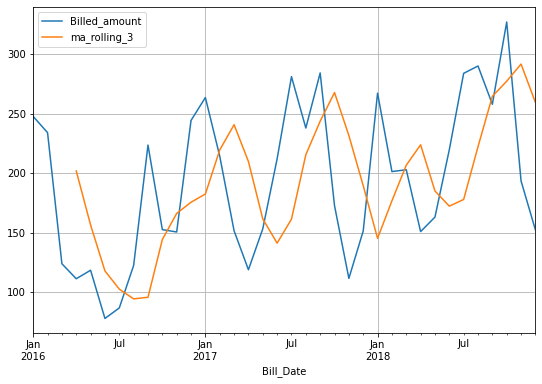

In [10]:
## plot
bill_2018.plot(figsize=(9,6), grid=True);

### Weighted Moving Average:
$\frac{(t\times \text{weighting factor}) + ((t-1) \times \text{weighting factor}-1) + ... + ((t-n) \times \text{weighting factor} - n)}{n}$

In [11]:
##
def wma(weights): # weights are 'array'
    def calc(x): # x is 'Billed_amount'
        return (weights*x).mean()
    return calc    

In [12]:
##
bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5, 1, 1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [13]:
##
bill_2018['wma_rolling_3'] = bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5, 1, 1.5]))).shift(1)
bill_2018.head(10)

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


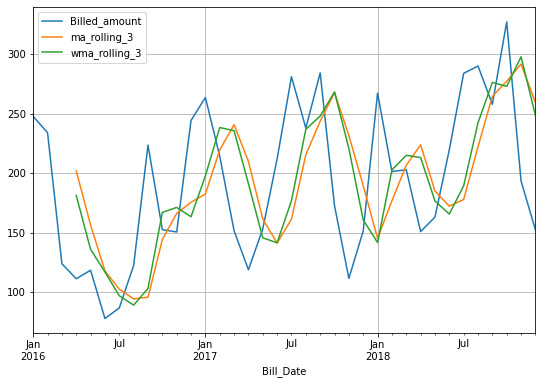

In [14]:
## plot
bill_2018.plot(figsize=(9,6), grid=True);

### Exponential Moving Average:
$(\text{close} - \text{previous EMA}) \times (\frac{2}{(\text{span}+1)}) + \text{previous EMA}$

In [15]:
##
bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().head()
# span -- the duration

Bill_Date
2016-01-01    247.73000
2016-02-01    240.92000
2016-03-01    182.38500
2016-04-01    146.80250
2016-05-01    132.58625
Name: Billed_amount, dtype: float64

In [16]:
##
bill_2018['ewm_window_3'] = bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean()
bill_2018.head(10)

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,247.730000
2016-02-01,234.11,NaN,NaN,240.920000
2016-03-01,123.85,NaN,NaN,182.385000
2016-04-01,111.22,201.896667,181.250000,146.802500
2016-05-01,118.37,156.393333,135.911667,132.586250
2016-06-01,77.81,117.813333,116.900000,105.198125
2016-07-01,86.67,102.466667,96.898333,95.934063
2016-08-01,122.40,94.283333,89.000000,109.167031
2016-09-01,223.62,95.626667,103.058333,166.393516


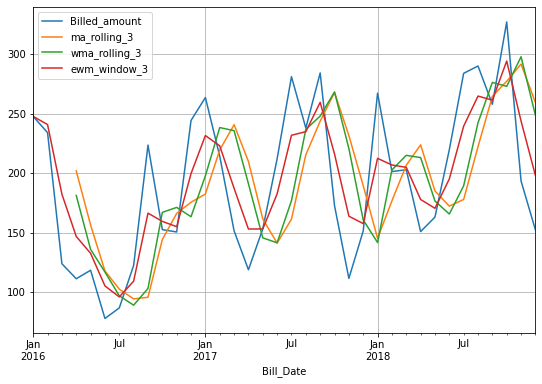

In [17]:
## plot
bill_2018.plot(figsize=(9,6), grid=True);

### Exponential Smoothing:
$\hat{Y}_{t-1} = \alpha[Y_{t} + (1-\alpha)Y_{t-1} + (1-\alpha)^{2} Y_{t-2} + (1-\alpha)^{3} Y_{t-3} + ...]$

In [18]:
bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean().head(10)

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    158.153800
2016-04-01    125.300140
2016-05-01    120.449042
2016-06-01     90.601713
2016-07-01     87.849514
2016-08-01    112.034854
2016-09-01    190.144456
2016-10-01    163.821337
Name: Billed_amount, dtype: float64

In [19]:
##
bill_2018['esm_window_3_7']= bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean().shift(1)
bill_2018.head(10)

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,247.730000,NaN
2016-02-01,234.11,NaN,NaN,240.920000,NaN
2016-03-01,123.85,NaN,NaN,182.385000,NaN
2016-04-01,111.22,201.896667,181.250000,146.802500,158.153800
2016-05-01,118.37,156.393333,135.911667,132.586250,125.300140
2016-06-01,77.81,117.813333,116.900000,105.198125,120.449042
2016-07-01,86.67,102.466667,96.898333,95.934063,90.601713
2016-08-01,122.40,94.283333,89.000000,109.167031,87.849514
2016-09-01,223.62,95.626667,103.058333,166.393516,112.034854


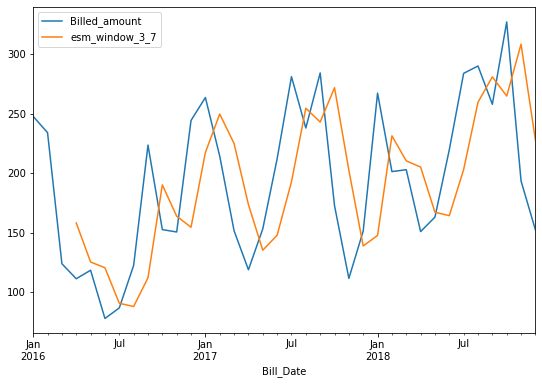

In [20]:
##
bill_2018[['Billed_amount', 'esm_window_3_7']].plot(figsize=(9,6));

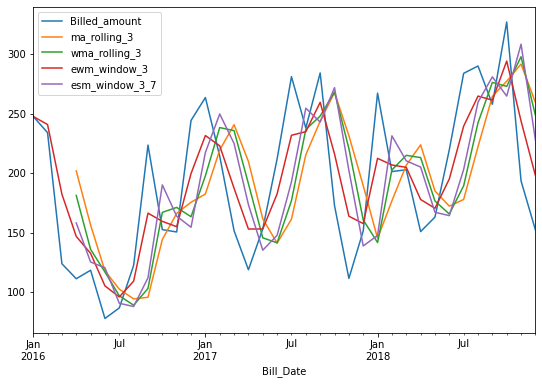

In [21]:
##
bill_2018.plot(figsize=(9, 6));

In [22]:
####
bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False, min_periods=3).mean().head(10)

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    207.705800
2016-04-01    178.760060
2016-05-01    160.643042
2016-06-01    135.793129
2016-07-01    121.056191
2016-08-01    121.459333
2016-09-01    152.107533
2016-10-01    152.237273
Name: Billed_amount, dtype: float64

In [23]:
##
bill_2018['esm_window_3_3']= bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False, min_periods=3).mean().shift(1)
bill_2018.head(10)

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,247.730000,NaN,NaN
2016-02-01,234.11,NaN,NaN,240.920000,NaN,NaN
2016-03-01,123.85,NaN,NaN,182.385000,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,146.802500,158.153800,207.705800
2016-05-01,118.37,156.393333,135.911667,132.586250,125.300140,178.760060
2016-06-01,77.81,117.813333,116.900000,105.198125,120.449042,160.643042
2016-07-01,86.67,102.466667,96.898333,95.934063,90.601713,135.793129
2016-08-01,122.40,94.283333,89.000000,109.167031,87.849514,121.056191
2016-09-01,223.62,95.626667,103.058333,166.393516,112.034854,121.459333


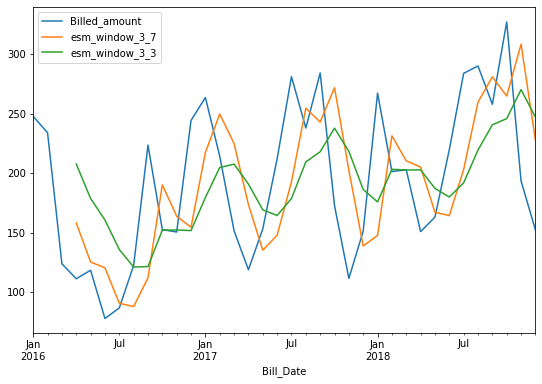

In [24]:
##
bill_2018[['Billed_amount', 'esm_window_3_7', 'esm_window_3_3']].plot(figsize=(9,6));

In [25]:
bill_2018.head(10)

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,247.730000,NaN,NaN
2016-02-01,234.11,NaN,NaN,240.920000,NaN,NaN
2016-03-01,123.85,NaN,NaN,182.385000,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,146.802500,158.153800,207.705800
2016-05-01,118.37,156.393333,135.911667,132.586250,125.300140,178.760060
2016-06-01,77.81,117.813333,116.900000,105.198125,120.449042,160.643042
2016-07-01,86.67,102.466667,96.898333,95.934063,90.601713,135.793129
2016-08-01,122.40,94.283333,89.000000,109.167031,87.849514,121.056191
2016-09-01,223.62,95.626667,103.058333,166.393516,112.034854,121.459333


## Performances
$\text{RMSE} = \sqrt{\sum^{n}_{i-1} \frac{\hat{y}_{i} - y_{i}}{n}}$

In [26]:
((bill_2018['Billed_amount'] - bill_2018['ma_rolling_3']) ** 2).mean() **0.5

70.98561687433802

In [27]:
((bill_2018['Billed_amount'] - bill_2018['wma_rolling_3']) ** 2).mean() **0.5

65.82572602256133

In [28]:
((bill_2018['Billed_amount'] - bill_2018['ewm_window_3']) ** 2).mean() **0.5

31.710834656453752

In [29]:
((bill_2018['Billed_amount'] - bill_2018['esm_window_3_7']) ** 2).mean() **0.5

61.26408398853503

In [30]:
((bill_2018['Billed_amount'] - bill_2018['esm_window_3_3']) ** 2).mean() **0.5

65.22424423118377

**Reference**
1. (AI Engineering) Moving Averages Explained - Time Series Data (YouTube Link: https://www.youtube.com/watch?v=r71hWIUscV4&list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK&index=4)